In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns    

In [4]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DACON/WINE/data/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DACON/WINE/data/test.csv')

submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DACON/WINE/data/sample_submission.csv')

pd.set_option('display.max_rows', None) ## 모든 열을 출력한다.

*   quality 품질
*   fixed acidity 산도
*   volatile acidity 휘발성산
*   citric acid 시트르산
*   residual sugar 잔당
*   chlorides 염화물
*   free sulfur dioxide 독립 이산화황
*   total sulfur dioxide  총 이산화황
*   density 밀도
*   pH 수소이온농도
*   sulphates 황산염
*   alcohol 도수
*   type 종류



In [5]:
train.head()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 5497 non-null   int64  
 1   quality               5497 non-null   int64  
 2   fixed acidity         5497 non-null   float64
 3   volatile acidity      5497 non-null   float64
 4   citric acid           5497 non-null   float64
 5   residual sugar        5497 non-null   float64
 6   chlorides             5497 non-null   float64
 7   free sulfur dioxide   5497 non-null   float64
 8   total sulfur dioxide  5497 non-null   float64
 9   density               5497 non-null   float64
 10  pH                    5497 non-null   float64
 11  sulphates             5497 non-null   float64
 12  alcohol               5497 non-null   float64
 13  type                  5497 non-null   object 
dtypes: float64(11), int64(2), object(1)
memory usage: 601.4+ KB


In [8]:
test.head()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,9.0,0.31,0.48,6.6,0.043,11.0,73.0,0.99380,2.90,0.38,11.6,white
1,1,13.3,0.43,0.58,1.9,0.070,15.0,40.0,1.00040,3.06,0.49,9.0,red
2,2,6.5,0.28,0.27,5.2,0.040,44.0,179.0,0.99480,3.19,0.69,9.4,white
3,3,7.2,0.15,0.39,1.8,0.043,21.0,159.0,0.99480,3.52,0.47,10.0,white
4,4,6.8,0.26,0.26,2.0,0.019,23.5,72.0,0.99041,3.16,0.47,11.8,white


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 1000 non-null   int64  
 1   fixed acidity         1000 non-null   float64
 2   volatile acidity      1000 non-null   float64
 3   citric acid           1000 non-null   float64
 4   residual sugar        1000 non-null   float64
 5   chlorides             1000 non-null   float64
 6   free sulfur dioxide   1000 non-null   float64
 7   total sulfur dioxide  1000 non-null   float64
 8   density               1000 non-null   float64
 9   pH                    1000 non-null   float64
 10  sulphates             1000 non-null   float64
 11  alcohol               1000 non-null   float64
 12  type                  1000 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 101.7+ KB


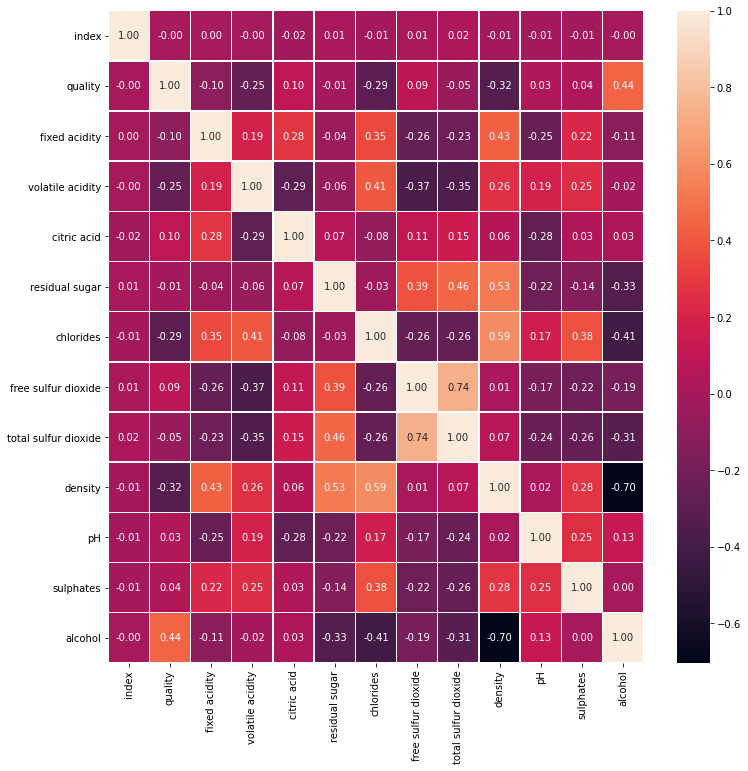

In [12]:
# train의 변수 간 상관관계를 살펴봅니다.
plt.figure(figsize=(12,12))
sns.heatmap(data = train.corr( method='spearman'), annot=True, fmt = '.2f', linewidths=.5)

In [ ]:
plt.figure(figsize=(12,12))
a =  train['pH']
b = train['sulphates']
c = train['residual sugar']

plt.hist(a, bins=5, density=True, alpha=0.7, histtype='stepfilled')
plt.hist(b, bins=5, density=True, alpha=0.5, histtype='stepfilled')
#plt.hist(c, bins=5, density=True, alpha=0.9, histtype='stepfilled')
plt.show()

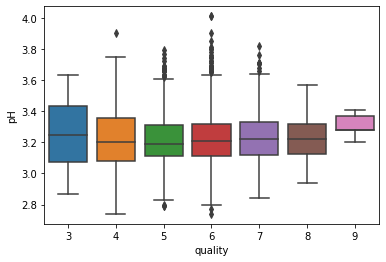

In [70]:
sns.boxplot(x=train['quality'],y=train['pH'])

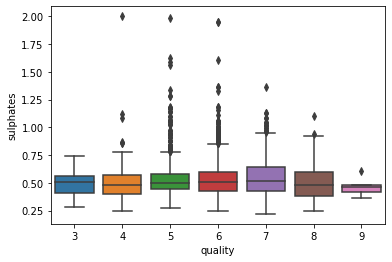

In [71]:
sns.boxplot(x=train['quality'],y=train['sulphates'])

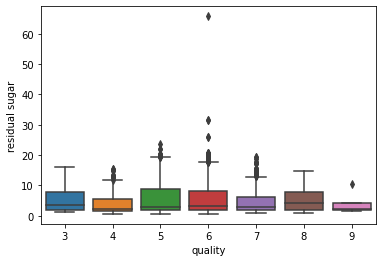

In [72]:
sns.boxplot(x=train['quality'],y=train['residual sugar'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


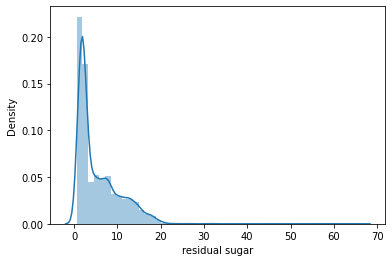

In [40]:
sns.distplot(train['residual sugar'])

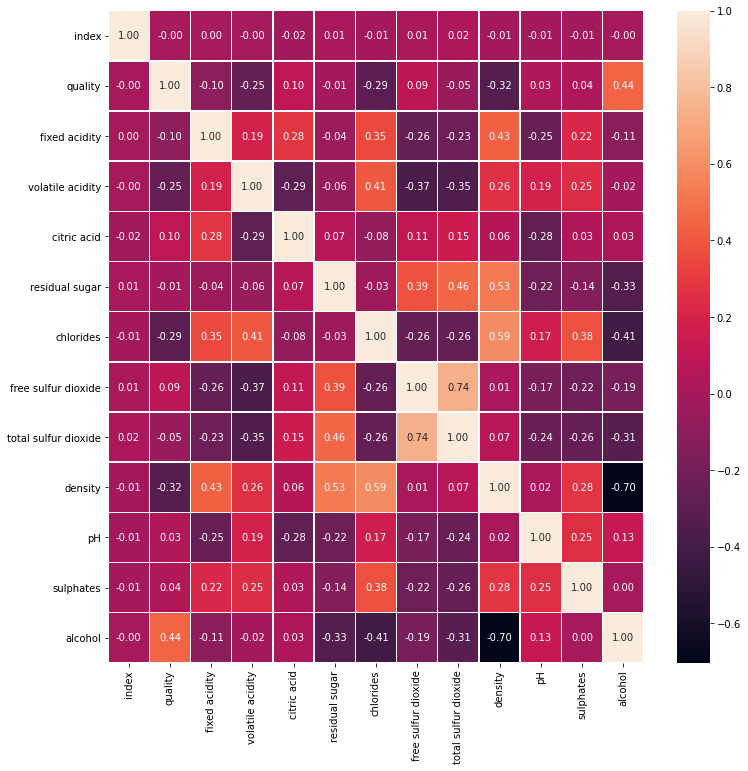

In [74]:
# train의 변수 간 상관관계를 살펴봅니다.
plt.figure(figsize=(12,12))
sns.heatmap(data = train.corr( method='spearman'), annot=True, fmt = '.2f', linewidths=.5)

In [77]:
features = ['alcohol','density','chlorides','volatile acidity']
target = ['quality']

X_train = train[features]
y_train  = train[target]

X_test = test[features]

In [78]:
from sklearn.model_selection import KFold
k_fold = KFold(n_splits=5,shuffle=True, random_state=99)

In [79]:
# 하이퍼파라미터 (커널스케일, 박스컨스트레인트 등 모델파라미터를 의미) 의 최적값을 찾음
from sklearn.model_selection import GridSearchCV

In [81]:

from sklearn.linear_model import LogisticRegression # 로지스틱 회귀 모델 불러오기

# ***LogisticRegression***

In [108]:

model = LogisticRegression(random_state=99 ,penalty='l2')
#learning_rate: 기존모델의 성능을 다음 모델에 얼만큼 영향을 줄것인지 가중치. 값이 적을수록 미세한영향
#min_child_samples : 최종 결정 클래스인 Leaf Node가 되기 위해서 최소한으로 필요한 데이터 개체의 수
params = { 
    'max_iter' : [1000,2000,5000,10000],
    'solver' : ['lgfgs','liblinear','sag','newton-cg','saga'],
    'C' : [0.1,1,5,10]
    }
# 대회에서는 RMSE 가 평가지표이므로 scoring 을 neg_mean_squared_error 로 설정
gs = GridSearchCV(estimator=model,
                  param_grid=params,
                  scoring = 'accuracy',
                  cv=k_fold) # 일반적으로 kfold를 사용하고 cv=5 해도 동일


In [ ]:
gs.fit(X_train,y_train.values.ravel())

In [110]:
gs.best_params_

{'C': 0.1, 'max_iter': 1000, 'solver': 'sag'}

In [111]:
model=LogisticRegression(random_state=99, C=0.1, max_iter = 1000, penalty = 'l2', solver = 'sag')
model.fit(X_train,y_train)
model.score(X_train,y_train)
#0.524467891577224


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.524467891577224

In [ ]:
lrWine = submission.copy()
lrWine['quality'] = model.predict(X_test)
lrWine['quality']

In [118]:
lrWine.to_csv('lr_0.1_1000_sag_0725.csv',index=False)

# ***SVC***

In [114]:
from sklearn.svm import SVC

In [119]:
model_svc = SVC(random_state=99)

params = { 
    
    'max_iter' : [10,100,500,1000],
    'kernel' : ['rbf','poly','linear'],
    'gamma' :[0.01,0.1,1,10,100] ,
    'C' : [0.1,1,5,10]
    }
    
gs = GridSearchCV(estimator=model_svc,
                  param_grid=params,
                  scoring = 'accuracy',
                  cv=k_fold) # 일반적으로 kfold를 사용하고 cv=5 해도 동일


In [ ]:
gs.fit(X_train,y_train.values.ravel())

In [121]:
gs.best_params_

{'C': 1, 'gamma': 100, 'kernel': 'rbf', 'max_iter': 1000}

In [122]:
model_svc = SVC(random_state=99,C= 1, gamma= 100, kernel= 'rbf', max_iter= 1000)
model_svc.fit(X_train,y_train.values.ravel())
model_svc.score(X_train,y_train)
#0.5770420229215936

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


0.5770420229215936

In [ ]:
svcWine = submission.copy()
svcWine['quality'] = model_svc.predict(X_test)
svcWine['quality']

In [125]:
svcWine.to_csv('svc_1_100_rbf_1000_0725.csv',index=False)

# ***GradientBoostingClassifier***



In [126]:
from sklearn.ensemble import GradientBoostingClassifier

In [130]:
model_gbrt = GradientBoostingClassifier(random_state=99 ,subsample=0.7)

params = { 
    
    'n_estimators' : [100,200,500],
    'min_samples_leaf' : [2,3,5],
    'min_samples_split' : [2,3,5],
    'learning_rate' : [0.01,0.1,1],
    'max_depth' : [2,3,5]
    } 
gs = GridSearchCV(estimator=model_gbrt,
                  param_grid=params,
                  scoring = 'accuracy',
                  cv=k_fold) # 일반적으로 kfold를 사용하고 cv=5 해도 동일


In [131]:
gs.fit(X_train,y_train.values.ravel())

KeyboardInterrupt: ignored

In [ ]:
gs.best_params_

In [ ]:
model_gbrt = GradientBoostingClassifier(random_state=99, learning_rate= 0.01, min_samples_leaf = 2, min_samples_split = 2, n_estimators= 500,max_depth = 5 ,subsample=0.7)
model_gbrt.fit(X_train,y_train.values.ravel())
model_gbrt.score(X_train,y_train)
#0.9562289562289562
#0.8473625140291807
#0.8597081930415263
#0.8282828282828283
#0.7867564534231201
#0.8181818181818182

0.9236812570145904

In [ ]:
gbrtWine = submission.copy()
gbrtWine['Survived'] = model_gbrt.predict(X_test)
gbrtWine['Survived']

In [ ]:

gbrtWine.to_csv('gbrt_fmse_0.01_500_2_2_5_0717.csv',index=False)

# ***xgboost***





In [ ]:
import xgboost as xgb

In [ ]:
model_xgb = xgb.XGBClassifier( random_state=99,metric= 'auc',objective='binary:logistic' ,eval_metric = 'auc')
#learning_rate: 기존모델의 성능을 다음 모델에 얼만큼 영향을 줄것인지 가중치. 값이 적을수록 미세한영향
#min_child_samples : 최종 결정 클래스인 Leaf Node가 되기 위해서 최소한으로 필요한 데이터 개체의 수
params = { 
    'learning_rate' : [0.001,0.01,0.1,1,5,10],
    'n_estimators' : [100,500,1000,2000] ,
    'max_depth' : [3,5,10] 
    }
# 대회에서는 RMSE 가 평가지표이므로 scoring 을 neg_mean_squared_error 로 설정
gs = GridSearchCV(estimator=model_xgb,
                  param_grid=params,
                  scoring = 'accuracy',
                  cv=k_fold) # 일반적으로 kfold를 사용하고 cv=5 해도 동일


In [ ]:
gs.fit(X_train,y_train.values.ravel())

In [ ]:
gs.best_params_

In [ ]:
import numpy as np
model=xgb.XGBClassifier(random_state=99,n_estimators=1000,learning_rate= 0.01,max_depth = 5 , objective = 'binary:logistic',metric= 'auc',eval_metric = 'auc')

models = []

# iloc : index로 접근 X_train.iloc[train_idx] : X_train의 train_idx 값에 해당하는 행
for train_idx,val_idx in k_fold.split(X_train):
  x_t = X_train.iloc[train_idx]
  y_t = y_train.iloc[train_idx]
  x_val = X_train.iloc[val_idx]
  y_val = y_train.iloc[val_idx]
  
  #eval_set : 검증용 set ,early_stopping_rounds : 과적합을 막기위해 어느단계에서 멈출지, n_estimators 만큼 반복하는데 early_stopping_rounds 만큼 성능의 증가(오차율감소)가 없다면 멈춤
  # verbose= 해당숫자만큼 진행했을때 진행과정 출력
  models.append(model.fit(x_t,(y_t),eval_set=[(x_val,y_val)],early_stopping_rounds=100,verbose=1000))
  print(model.score(X_train,y_train))

In [ ]:
preds = []
for model in models:
  preds.append(model.predict(X_test))
  print(preds)

In [ ]:
xgbWine = submission.copy()
xgbWine['Survived'] = np.mean((preds),axis=0)
xgbWine['Survived']

In [ ]:

xgbWine.to_csv('xgb_0.01_5_0716.csv',index=False)